In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plot

data = pd.read_csv("../../Salary_Dataset_with_Extra_Features.csv")
data.head(2)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android


### make a company anaiys

get data

In [20]:
def company_deatils(name : str):
  company_data  =  data[data["Company Name"].str.lower() == name.lower()]

  #company_level
  dashboard_data = {
    "overall_rating" : np.mean(company_data["Rating"]),
    "Jobs_role" : list(np.unique(company_data["Job Roles"])),
    "Jobs_status" : list(np.unique(company_data["Employment Status"])),
    "Company_location" : list(np.unique(company_data["Location"]))
  }

  #roles level

  roles_emp_status = company_data.groupby(by=["Job Roles", "Employment Status"]).agg({
    "Salary" : "mean",
    "Salaries Reported" : "sum",
  }).reset_index()

  roles_location = company_data.groupby(by=["Job Roles", "Employment Status", "Location"]).agg({
    "Salary" : "mean",
    "Salaries Reported" : "sum",
  }).reset_index()

  #max salary
  max_emp_status = company_data.groupby(by=["Job Roles", "Employment Status"]).agg({
    "Salary" : "max",
  }).reset_index()

  #min salary
  min_emp_status = company_data.groupby(by=["Job Roles", "Employment Status"]).agg({
    "Salary" : "min",
  }).reset_index()



  return dashboard_data, roles_location, roles_emp_status, max_emp_status, min_emp_status



dashboard_data, roles_location, roles_emp_status, max_emp_status, min_emp_status  = company_deatils("Amazon")
dashboard_data
  

{'overall_rating': 3.8,
 'Jobs_role': ['Android',
  'Backend',
  'Database',
  'Frontend',
  'IOS',
  'Java',
  'Python',
  'SDE',
  'Testing',
  'Web'],
 'Jobs_status': ['Contractor', 'Full Time', 'Intern'],
 'Company_location': ['Bangalore',
  'Chennai',
  'Hyderabad',
  'Jaipur',
  'Kolkata',
  'Madhya Pradesh',
  'Mumbai',
  'New Delhi',
  'Pune']}

In [4]:
roles_emp_status

,Job Roles,Employment Status,Salary,Salaries Reported
0,Android,Full Time,7.630000e+05,4
1,Android,Intern,9.840000e+05,1
2,Backend,Full Time,2.495333e+06,9
3,Database,Full Time,2.066667e+06,3
4,Frontend,Full Time,1.648000e+06,9
5,Frontend,Intern,1.200000e+05,1
6,IOS,Full Time,2.400000e+06,1
7,Java,Full Time,6.140000e+05,4
8,Python,Full Time,5.040000e+05,3
9,SDE,Contractor,1.116667e+06,8


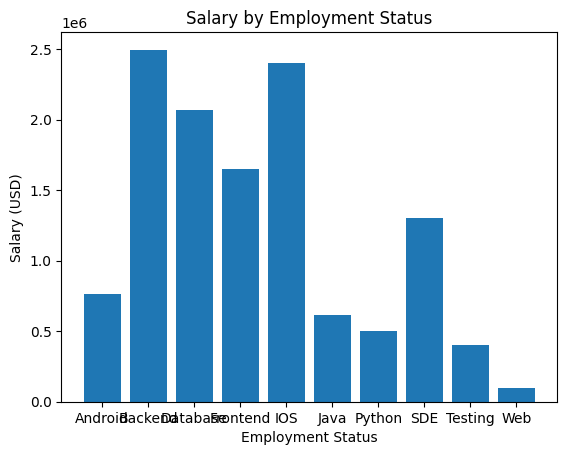

In [ ]:
from matplotlib.pyplot import bar, xlabel, ylabel, title

graph = roles_emp_status[roles_emp_status["Employment Status"] == "Full Time"].drop(columns=["Salaries Reported","Employment Status"])

bar(graph["Job Roles"], graph["Salary"])
xlabel('Employment Status');
ylabel('Salary (USD)');
title('Salary by Employment Status');


In [15]:
graph

,Job Roles,Salary
0,Android,7.630000e+05
2,Backend,2.495333e+06
3,Database,2.066667e+06
4,Frontend,1.648000e+06
6,IOS,2.400000e+06
7,Java,6.140000e+05
8,Python,5.040000e+05
10,SDE,1.302078e+06
12,Testing,4.000000e+05
13,Web,1.000000e+05


In [19]:
max_emp_status

,Job Roles,Employment Status,Salary
0,Android,Full Time,1900000
1,Android,Intern,984000
2,Backend,Full Time,3300000
3,Database,Full Time,2900000
4,Frontend,Full Time,3300000
5,Frontend,Intern,120000
6,IOS,Full Time,2400000
7,Java,Full Time,700000
8,Python,Full Time,504000
9,SDE,Contractor,2300000


In [21]:
min_emp_status

,Job Roles,Employment Status,Salary
0,Android,Full Time,228000
1,Android,Intern,984000
2,Backend,Full Time,672000
3,Database,Full Time,700000
4,Frontend,Full Time,240000
5,Frontend,Intern,120000
6,IOS,Full Time,2400000
7,Java,Full Time,456000
8,Python,Full Time,504000
9,SDE,Contractor,100000
